In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
input_data = df[['Mileage']]
output_data = df['Price']
#Setting our independant and dependant variables

In [5]:
regr1 = linear_model.LinearRegression()

In [6]:
regr1.fit(input_data,output_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
regr1.score(input_data,output_data)

0.020463447323489481

In [8]:
model = Pipeline([('Poly',PolynomialFeatures(degree=2)),('linear',linear_model.LinearRegression())])
#Sets up our Polynomial fit.  Using 2 degrees here to try to avoid overfitting.

In [9]:
model.fit(input_data,output_data)

Pipeline(steps=[('Poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [10]:
model.score(input_data,output_data)

0.024681252371626994

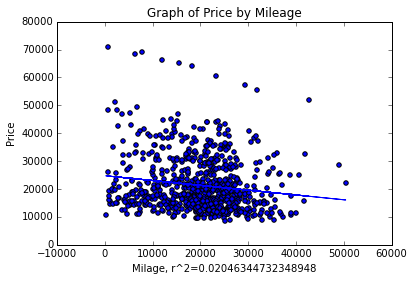

In [11]:
plt.scatter(input_data,output_data)
plt.xlabel('Milage, r^2={}'.format(regr1.score(input_data,output_data)))
plt.ylabel('Price')
plt.plot(input_data,regr1.predict(input_data))
plt.title('Graph of Price by Mileage')

In [12]:
def plot_regression(input_data,fn):
    # scatter plot first
    plt.scatter(input_data,output_data)
    xmin, xmax = plt.xlim()
    xs = np.linspace(xmin, xmax, 100)
    # fn is our (y = mx + b) expression
    plt.plot(xs, [fn(x) for x in xs])
    
#Taken from the day's notes.  input_data added as a variable to allow for easy switching.

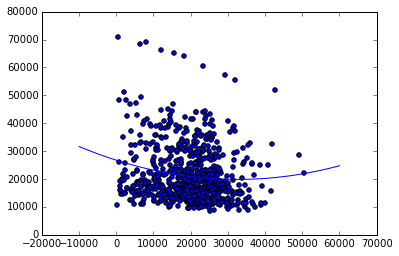

In [13]:
fn = lambda x: model.predict(x)[0]
plot_regression(input_data, fn)

* The above graph shows the polynomial fit for price by mileage.
* The r ^ 2 is nearly completely insignificant at .025

# Task 1 Results

* When looking at price by mileage it is nearly impossible to draw any conclusions from the data.  Even with multipolinomial fits the r^2 never even approches .1
* The problem seems to be there's just a giant cluster of data and there's honestly no corralation to be found

In [14]:
clean = df.drop(['Make','Model','Trim','Type'],axis=1)

In [15]:
clean = clean.drop('Price',axis=1)
#Making and cleaning a new dataframe to iterate through

In [16]:
input_data = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
output_data = df['Price']
#Resetting new independant and dependant variables.  

In [17]:
regr2 = linear_model.LinearRegression()

In [18]:
regr2.fit(input_data,output_data)
#Attempting the model with all data points

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
regr2.score(input_data,output_data)
#Still not a very good fit

0.4462643536728379

In [20]:
regr3 = linear_model.LinearRegression()

In [21]:
combos = [list(itertools.combinations(clean.columns,x)) for x in range(1,8)]

In [22]:
combo_list = []
for perm in combos:
    for combo in perm:
        combo_list.append(list(combo))

In [23]:
count = 0
r = [0]
index = []
while count < len(combo_list):
    regr3.fit(df[combo_list[count]],output_data)
    if regr3.score(df[combo_list[count]],output_data) > r[-1]:
        r.append(regr3.score(df[combo_list[count]],output_data))
        index.append(combo_list[count])
    count += 1
print(r)
print(index)
#This creates a list of best-fit linear regressions adding each time the previous best
#was beaten.  Starts with single variables.

[0, 0.020463447323489481, 0.32385903759512258, 0.33982070826367505, 0.34346053658303799, 0.38394913240273443, 0.40237458603160192, 0.40380272693971553, 0.41914964510731778, 0.42250742147747633, 0.4225307670398466, 0.42409748258510394, 0.4369402151237245, 0.43780574153663798, 0.44569092105870245, 0.4462643536728379]
[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Cylinder', 'Doors'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Cylinder', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound'], ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather'], ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]


In [24]:
regr3.fit(df[['Cylinder']],output_data)
#Looking at Cylinder because it carried the majority of the r^2 value.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
regr3.score(df[['Cylinder']],output_data)

0.32385903759512258

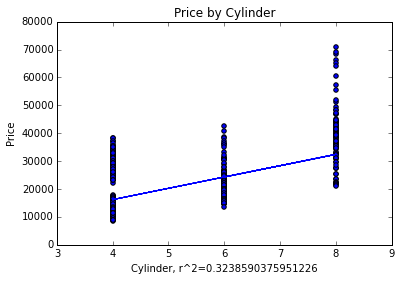

In [26]:
plt.scatter(df[['Cylinder']],output_data)
plt.plot(df[['Cylinder']],regr3.predict(df[['Cylinder']]))
plt.title('Price by Cylinder')
plt.ylabel('Price')
plt.xlabel('Cylinder, r^2={}'.format(regr3.score(df[['Cylinder']],output_data)))

In [27]:
model = Pipeline([('Poly',PolynomialFeatures(degree=2)),('linear',linear_model.LinearRegression())])

In [28]:
model.fit(df[['Cylinder']],output_data)

Pipeline(steps=[('Poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [29]:
model.score(df[['Cylinder']],output_data)

0.4630343518084109

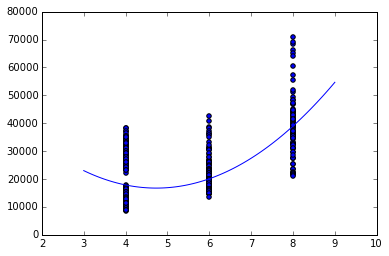

In [30]:
fn = lambda x: model.predict(x)[0]
plot_regression(df[['Cylinder']],fn)

# Part 2 Results 

* Looking at the data above it does not appear that our current data supports a strong corralation between any number of factors and price.
* The strongest single variable was Cylinder which got a r^2 of .32 when the entire data set only ever got to a r^2 of .45.  This suggests that it is the most predictive element, even if not terribly accurate. 
* Using polynomial regression we can increase the R^2 to a point but it seems best suited to data with more spread out points rather than static values.

In [31]:
df.head()
#Just taking a quick peek at our data

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [32]:
for col in df.columns[2:6]:
    for thing in df[col].unique():
        df[thing] = [int(x == thing) for x in df[col]]
#Swinging our unique non-int values into their own columns with 1 or 0 bouleon values

In [33]:
for thing in df.columns[2:6]:
    print(df[thing].unique())

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']
['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt' 'Corvette'
 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am' 'Grand Prix'
 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO' '9-2X AWD' 'Ion'
 'L Series']
['Sedan 4D' 'CX Sedan 4D' 'CXL Sedan 4D' 'CXS Sedan 4D' 'Custom Sedan 4D'
 'Limited Sedan 4D' 'Special Ed Ultra 4D' 'DHS Sedan 4D' 'DTS Sedan 4D'
 'Hardtop Conv 2D' 'LS Hatchback 4D' 'LS Sedan 4D' 'LT Hatchback 4D'
 'LT Sedan 4D' 'SVM Hatchback 4D' 'SVM Sedan 4D' 'Coupe 2D' 'LS Coupe 2D'
 'LS Sport Coupe 2D' 'LS Sport Sedan 4D' 'Conv 2D' 'SS Sedan 4D'
 'LS MAXX Hback 4D' 'LT MAXX Hback 4D' 'MAXX Hback 4D' 'LT Coupe 2D'
 'SS Coupe 2D' 'GXP Sedan 4D' 'SE Sedan 4D' 'SLE Sedan 4D' 'GT Sedan 4D'
 'GT Coupe 2D' 'GTP Sedan 4D' 'AWD Sportwagon 4D' 'GT Sportwagon'
 'Sportwagon 4D' 'Linear Conv 2D' 'Linear Sedan 4D' 'Aero Conv 2D'
 'Aero 

In [34]:
df = df.drop([x for x in df.columns[2:6]],axis=1)
df.head()
#Cleaning up and a quick view of what we have.  Make sure to not run more than once as it will
#delete additional data.

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,...,Arc Wagon 4D,Linear Wagon 4D,Aero Wagon 4D,Quad Coupe 2D,L300 Sedan 4D,Sedan,Convertible,Hatchback,Coupe,Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
regr4 = linear_model.LinearRegression()

In [36]:
output_data = df.Price
r = {}
for col in df.columns[1:]:
    regr4.fit(df[[col]],output_data)
    r[col] = regr4.score(df[[col]],output_data)
#Started using a dictionary due to sheer volume of options

In [37]:
sorted(r.items(), key=lambda x: x[1],reverse=True)[:5]

[('Cadillac', 0.43467222055774146),
 ('Cylinder', 0.32385903759512258),
 ('Liter', 0.31152674427904514),
 ('Convertible', 0.25808237266623624),
 ('Hardtop Conv 2D', 0.22329254532193288)]

In [38]:
regr4.fit(df[['Cadillac']],output_data)
#Fitting and plotting Cadillac since it had the strongest r^2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

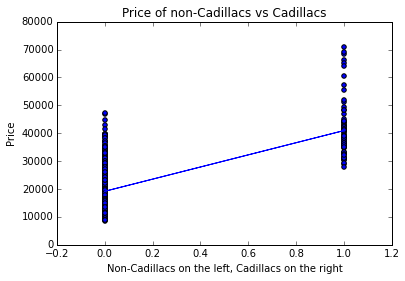

In [39]:
plt.scatter(df[['Cadillac']],output_data)
plt.plot(df[['Cadillac']],regr4.predict(df[['Cadillac']]))
plt.title('Price of non-Cadillacs vs Cadillacs')
plt.xlabel('Non-Cadillacs on the left, Cadillacs on the right')
plt.ylabel('Price')

In [40]:
model = Pipeline([('Poly',PolynomialFeatures(degree=2)),('linear',linear_model.LinearRegression())])

In [41]:
output_data = df.Price
r = {}
for col in df.columns[1:]:
    model.fit(df[[col]],output_data)
    r[col] = model.score(df[[col]],output_data)

In [42]:
sorted(r.items(), key=lambda x: x[1], reverse=True)[:5]

[('Cylinder', 0.4630343518084109),
 ('Cadillac', 0.43463901041079311),
 ('Liter', 0.34807632683844125),
 ('Convertible', 0.2580027932731338),
 ('Hardtop Conv 2D', 0.22315863341612097)]

In [43]:
model.fit(df[['Cylinder']],output_data)
#Looking at cylinders again since it was still the strongest single factor with
#a 2 degree poly fit.

Pipeline(steps=[('Poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

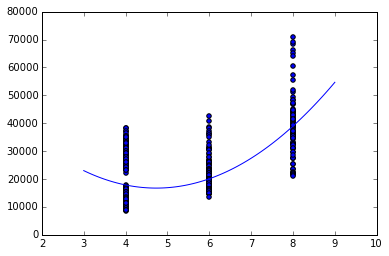

In [44]:
fn = lambda x: model.predict(x)[0]
plot_regression(df[['Cylinder']],fn)
#Graph is the same as above, the r^2 isn't great and only slightly improved by poly.

In [45]:
model = Pipeline([('Poly',PolynomialFeatures(degree=5)),('linear',linear_model.LinearRegression())])
#Looking at a 5 degree polynomial fit

In [46]:
output_data = df.Price
r = {}
for col in df.columns[1:]:
    model.fit(df[[col]],output_data)
    r[col] = model.score(df[[col]],output_data)

In [47]:
sorted(r.items(), key=lambda x: x[1], reverse=True)[:5]

[('Liter', 0.47988592783968276),
 ('Cylinder', 0.46303435180841079),
 ('Cadillac', 0.43467222055774146),
 ('Convertible', 0.25808237266623624),
 ('Hardtop Conv 2D', 0.22315444630922365)]

In [48]:
model.fit(df[['Liter']],output_data)
#Looking at Liter since it's jumped into the lead.  r^2 still not significant.

Pipeline(steps=[('Poly', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

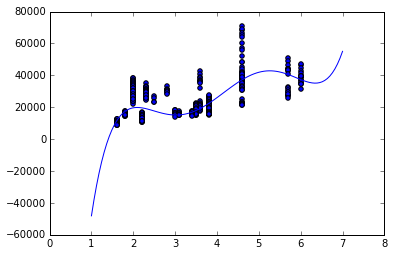

In [49]:
fn = lambda x: model.predict(x)[0]
plot_regression(df[['Liter']],fn)

In [50]:
model.fit(df[['Liter','Cylinder']],output_data)
#Looking for better r^2 I start combineing factors

Pipeline(steps=[('Poly', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [51]:
model.score(df[['Liter','Cylinder']],output_data)

0.71901342328502349

In [52]:
model.fit(df[['Liter','Cylinder','Cadillac']],output_data)

Pipeline(steps=[('Poly', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [53]:
model.score(df[['Liter','Cylinder','Cadillac']],output_data)

0.8623412534931657

# Part 3 Results

* When looking at car data we finally approach a good fit when we have the engine liter, the number of cylinders, and the make of the car.
* Cadillac was by far the most meaningful make, but other makes still carried a r^2 larger than .8
* When increasing the number of degrees you take a polynomial fit to it's important to remember the number of possible values you have.  With only 2 or 4 options there will not be much if any increase in fit since curving the line shouldn't change much.